In [11]:
#dependencies and data
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sem
import numpy as np

mice_data = "resources/Mouse_metadata.csv"
study_results = "resources/Study_results.csv"

mice_df = pd.read_csv(mice_data)
study_df = pd.read_csv(study_results)

#Merging to a single dataset on mouse ID
mousestudy_df = pd.merge(mice_df,study_df, on = "Mouse ID")
mousestudy_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
#Summary Statistics Table of Tumor volume
drug_reg = mousestudy_df.groupby("Drug Regimen")
avg_tumor = drug_reg["Tumor Volume (mm3)"].mean()
med_tumor = drug_reg["Tumor Volume (mm3)"].median()
var_tumor = drug_reg["Tumor Volume (mm3)"].var(ddof=0)
std_tumor = drug_reg["Tumor Volume (mm3)"].std(ddof=0)
sem_tumor = drug_reg["Tumor Volume (mm3)"].sem()


summary_stats_drugs = pd.DataFrame({"Average Tumor Volume (mm3)": avg_tumor,
                                   "Median Tumor Volume (mm3)" :med_tumor,
                                   "Tumor Volume (mm3) Variance":var_tumor,
                                   "Tumor Volume (mm3) Standard Deviation":std_tumor,
                                   "SEM Tumor Volume (mm3)": sem_tumor})
summary_stats_drugs



,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.322552,50.854632,42.088020,6.487528,0.512884
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


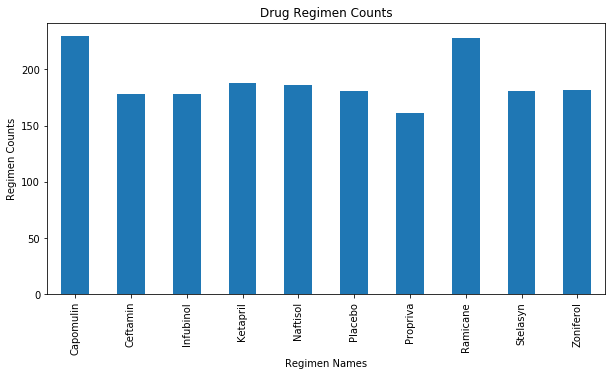

In [41]:
#Creating a Bar Plot for Regimens Pandas
regimen_group = mousestudy_df.groupby("Drug Regimen")
regimen_count = regimen_group["Drug Regimen"].count()


bar_plot = regimen_count.plot(kind="bar", figsize=(10,5))
bar_plot.set_title("Drug Regimen Counts")
bar_plot.set_ylabel("Regimen Counts")
bar_plot.set_xlabel("Regimen Names")
plt.show()
                              

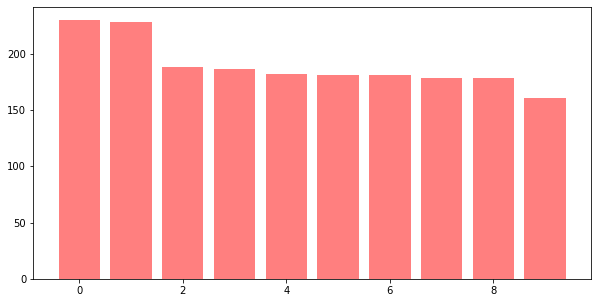

In [54]:
#Creating a Bar Plot with Matplot
drug_count = mousestudy_df["Drug Regimen"].value_counts()
# drug_names = mousestudy_df["Drug Regimen"].unique()
drug_regimen = pd.DataFrame({"Drug Counts": drug_count})
x_axis = np.arange(len(drug_count))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, drug_count, color='r', alpha=0.5, align="center")
# plt.xticks(tick_locations, drug_names, rotation="vertical")
plt.show()
